# EMG Signal for gesture recognition

In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
print(5)

5


In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import pandas as pd
Input_path = 'D:\\EMG-data\\EMG-data.csv'
df = pd.read_csv(Input_path)

print(df.shape)
df

(4237907, 11)


,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class,label
0,1,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0,1
1,5,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0,1
2,6,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
3,7,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
4,8,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4237902,50962,0.00001,-0.00001,-0.00002,-0.00004,-0.00012,0.00000,0.00002,0.00002,0,36
4237903,50963,0.00001,-0.00001,-0.00002,-0.00004,-0.00012,0.00000,0.00002,0.00002,0,36
4237904,50964,0.00001,-0.00001,-0.00002,-0.00004,-0.00012,0.00000,0.00002,0.00002,0,36
4237905,50965,0.00001,-0.00001,-0.00002,-0.00004,-0.00012,0.00000,0.00002,0.00002,0,36


In [4]:
print("class :", df["class"].unique())
print()
#print("Labels :",df["label"].unique()) # 36 people hand gesture data
#print()
print("Value Count :\n",df["class"].value_counts())

class : [0 1 2 3 4 5 6 7]

Value Count :
 class
0    2725157
6     253009
5     251733
4     251570
1     250055
3     249494
2     243193
7      13696
Name: count, dtype: int64


In [5]:
features = df.drop(columns=["label","class","time"])
display(features.head())
#print(features.shape())

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001
1,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001
2,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001
3,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001
4,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001


In [6]:
Class = df["class"]
print(Class.unique())
#print(Class.shape())

[0 1 2 3 4 5 6 7]


In [7]:
print(type(Class))
print(type(features))

Class = Class.values
features = features.values

print(type(Class))
print(type(features))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [8]:
# split in training 70%, validation 10 %,  test 20% test 
from sklearn.model_selection import train_test_split
# 80 and 20
x_train, x_test, y_train, y_test = train_test_split(features, Class, test_size=0.2, random_state=1)

In [9]:
x_train[0]

array([-5.0e-05,  4.0e-05, -1.9e-04, -5.7e-04, -1.2e-04,  4.0e-05,
       -1.0e-05, -3.0e-05])

In [10]:
# Normalizing data
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)

x_train -= mean
x_train /= std

x_test -= mean
x_test /= std

In [11]:
# one hot encoding Labels
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [12]:
# creating a function for plotting

def plot(loss,val_loss,acc,val_acc):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('acc')
    plt.legend()
    plt.show()

In [ ]:
#################################

In [15]:
from tensorflow.keras import layers, Sequential, optimizers, Input, Model

input_tensor = Input(shape=(8,))
x = layers.Dense(1024, activation='relu')(input_tensor)
y = layers.Dense(512, activation='relu')(x)
z = layers.Dense(256, activation='relu')(y)
z = layers.Dense(128, activation='relu')(z)
z = layers.Dense(64, activation='relu')(z)
z = layers.Dense(32, activation='relu')(z)
z = layers.Dense(128, activation='relu')(y) # acyclic graghs of layers
z = layers.Dense(64, activation='relu')(z)
z = layers.Dense(32, activation='relu')(z)
output_tensor = layers.Dense(8, activation='softmax')(z)

model = Model(input_tensor, output_tensor)

#SGD #RMSprop #Adam #Adadelta #Adagrad ##Adamax ###Nadam #Ftrl
opt = optimizers.Nadam(learning_rate=1e-3)
model.compile(optimizer = opt, 
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1024)                │           9,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 8)                   │             264 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 610,280 (2.33 MB)

 Trainable params: 610,280 (2.33 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# saving model, creating log for tensorboaed and applying few callbacks

def callbacks(Path, Dir):
    import tensorflow as tf
    import os

    Filepath = Path
    logdir = os.path.join(Filepath, Dir)
    
    # Ensure the directory exists
    os.makedirs(Filepath, exist_ok=True)

    callbacks_list = [
        tf.keras.callbacks.TensorBoard(
            log_dir=logdir,  # TensorBoard log path
            histogram_freq=1,
        ),
        tf.keras.callbacks.EarlyStopping(  # Stop if not improving
            monitor='val_accuracy',
            patience=2,  # Monitor validation accuracy
        ),
        tf.keras.callbacks.ModelCheckpoint(
            filepath=os.path.join(Filepath, "best_model.keras"),  # Save model path
            monitor='val_loss',  # Only save best weights
            save_best_only=True,
        ),
    ]
    return callbacks_list

Epoch 1/200
5298/5298 ━━━━━━━━━━━━━━━━━━━━ 302s 55ms/step - accuracy: 0.6433 - loss: 0.9486 - val_accuracy: 0.6494 - val_loss: 0.8858
Epoch 2/200
5298/5298 ━━━━━━━━━━━━━━━━━━━━ 324s 56ms/step - accuracy: 0.6498 - loss: 0.8814 - val_accuracy: 0.6535 - val_loss: 0.8685
Epoch 3/200
5298/5298 ━━━━━━━━━━━━━━━━━━━━ 287s 54ms/step - accuracy: 0.6565 - loss: 0.8584 - val_accuracy: 0.6622 - val_loss: 0.8407
Epoch 4/200
5298/5298 ━━━━━━━━━━━━━━━━━━━━ 293s 55ms/step - accuracy: 0.6677 - loss: 0.8287 - val_accuracy: 0.6757 - val_loss: 0.8119
Epoch 5/200
5298/5298 ━━━━━━━━━━━━━━━━━━━━ 296s 56ms/step - accuracy: 0.6820 - loss: 0.7959 - val_accuracy: 0.6891 - val_loss: 0.7823
Epoch 6/200
5298/5298 ━━━━━━━━━━━━━━━━━━━━ 278s 52ms/step - accuracy: 0.6979 - loss: 0.7622 - val_accuracy: 0.7056 - val_loss: 0.7520
Epoch 7/200
5298/5298 ━━━━━━━━━━━━━━━━━━━━ 285s 54ms/step - accuracy: 0.7129 - loss: 0.7313 - val_accuracy: 0.7172 - val_loss: 0.7270
Epoch 8/200
5298/5298 ━━━━━━━━━━━━━━━━━━━━ 282s 53ms/step - ac

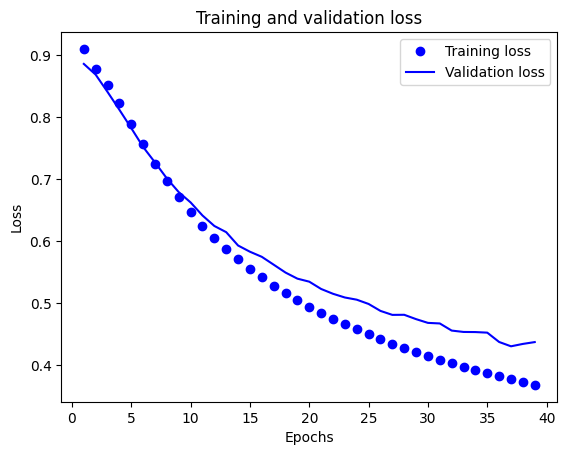

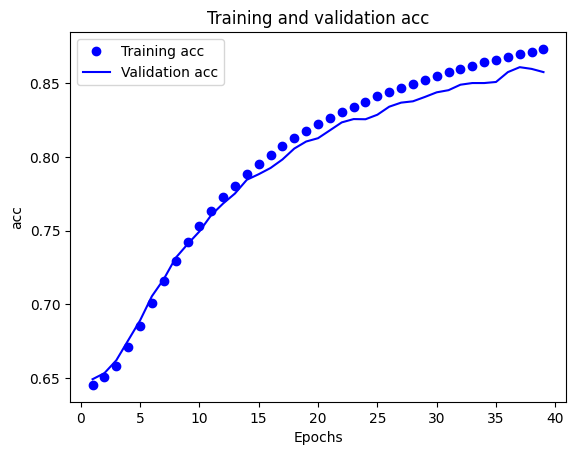

In [27]:
Path = "model1"
Dir = "my_log_dir"   
Call_B_Fun = callbacks(Path,Dir)

batch_size = 512            
epochs = 200                

history = model.fit(x_train, y_train,
                    batch_size=batch_size, epochs = epochs,
                    validation_split = 0.2, callbacks=Call_B_Fun)

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plot(loss,val_loss,acc,val_acc)

In [19]:
# saving our model
model.save('model1/emg_1.keras')

In [ ]:
#################

In [28]:
# loading saved model
from tensorflow.keras.models import load_model
emg = 'model1/best_model.keras'
emg_model = load_model(emg)
#emg_model.summary()

D:\Experiment1\glaucoma_env\lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 14 variables whereas the saved optimizer has 27 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [29]:
# Removing layers

new_model = Model(emg_model.inputs, emg_model.layers[-2].output) # removing layers
new_model.summary()
# removed all layers except conv

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1024)                │           9,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 32)                  │           2,080 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 610,016 (2.33 MB)

 Trainable params: 610,016 (2.33 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
from tensorflow.keras import layers, optimizers, Input, Model

input_tensor = Input(shape=(8,))
x = new_model(input_tensor)       # this is our old model
#z = layers.Dense(256, activation='relu')(x)
output_tensor = layers.Dense(8, activation='softmax')(x)

model = Model(input_tensor, output_tensor)

#SGD #RMSprop #Adam #Adadelta #Adagrad ##Adamax ###Nadam #Ftrl
opt = optimizers.Nadam(learning_rate=1e-3)
model.compile(optimizer = opt, 
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ functional_3 (Functional)            │ (None, 32)                  │         610,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 8)                   │             264 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 610,280 (2.33 MB)

 Trainable params: 610,280 (2.33 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
def callbacks(Path,Dir):
  import tensorflow as tf
  import os

  Filepath = Path
  logdir = os.path.join(Filepath, Dir)
    
  # Ensure the directory exists
  os.makedirs(Filepath, exist_ok=True)
  
  callbacks_list = [tf.keras.callbacks.TensorBoard(
                    log_dir=logdir,                 #  tensorboard log path      
                    histogram_freq=1,),
                    tf.keras.callbacks.EarlyStopping(   # stop if not improving
                    monitor='val_loss',patience=2,),           # monitor validation loss
                    tf.keras.callbacks.ReduceLROnPlateau(
                    monitor='val_loss',factor=0.1,         # lr ko .1 se multiply kerdo (kam kerdo)
                    patience=10,),                # reduce the lrate if val loss stop improving
                    tf.keras.callbacks.ModelCheckpoint(
                    filepath=os.path.join(Filepath, "best_model_2.keras"),             # save model path
                    monitor='val_loss',             # only save best weights
                    save_best_only=True,)]
  return callbacks_list

Epoch 1/200


D:\Experiment1\glaucoma_env\lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['input_layer_2']. Received: the structure of inputs=*
  warnings.warn(


5298/5298 ━━━━━━━━━━━━━━━━━━━━ 308s 57ms/step - accuracy: 0.6269 - loss: 1.3055 - val_accuracy: 0.7852 - val_loss: 0.5824 - learning_rate: 0.0010
Epoch 2/200
5298/5298 ━━━━━━━━━━━━━━━━━━━━ 302s 57ms/step - accuracy: 0.8253 - loss: 0.4764 - val_accuracy: 0.8454 - val_loss: 0.4596 - learning_rate: 0.0010
Epoch 3/200
5298/5298 ━━━━━━━━━━━━━━━━━━━━ 64501s 12s/step - accuracy: 0.8637 - loss: 0.3882 - val_accuracy: 0.8566 - val_loss: 0.4394 - learning_rate: 0.0010
Epoch 4/200
5298/5298 ━━━━━━━━━━━━━━━━━━━━ 342s 64ms/step - accuracy: 0.8697 - loss: 0.3752 - val_accuracy: 0.8597 - val_loss: 0.4322 - learning_rate: 0.0010
Epoch 5/200
5298/5298 ━━━━━━━━━━━━━━━━━━━━ 365s 69ms/step - accuracy: 0.8735 - loss: 0.3661 - val_accuracy: 0.8626 - val_loss: 0.4256 - learning_rate: 0.0010
Epoch 6/200
5298/5298 ━━━━━━━━━━━━━━━━━━━━ 343s 61ms/step - accuracy: 0.8762 - loss: 0.3593 - val_accuracy: 0.8647 - val_loss: 0.4209 - learning_rate: 0.0010
Epoch 7/200
5298/5298 ━━━━━━━━━━━━━━━━━━━━ 288s 54ms/step - acc

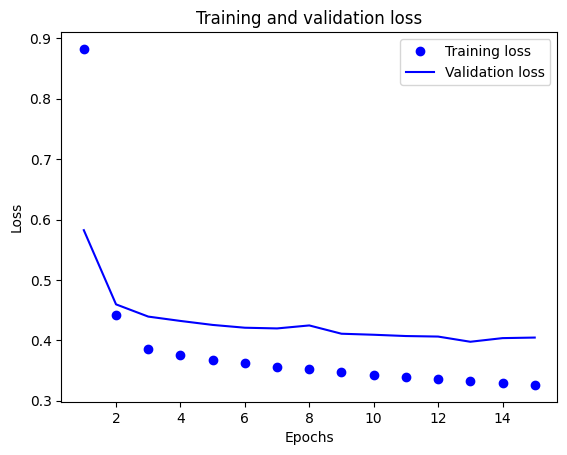

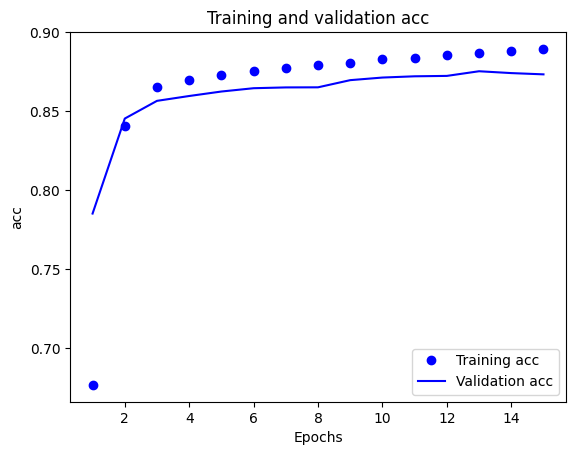

In [34]:
Path = "model2"
Dir = "my_log_dir"   
Call_B_Fun = callbacks(Path,Dir)

batch_size = 512            
epochs = 200                

history = model.fit(x_train, y_train,
                    batch_size=batch_size, epochs = epochs,
                    validation_split = 0.2, callbacks=Call_B_Fun)

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plot(loss,val_loss,acc,val_acc)

In [35]:
# saving our model
model.save('model2/emg_2.keras')

In [ ]:
###################

In [37]:
# loading saved model
from tensorflow.keras.models import load_model
emg = 'model2/emg_2.keras'
emg_model = load_model(emg)
emg_model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ functional_3 (Functional)            │ (None, 32)                  │         610,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 8)                   │             264 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,830,843 (6.98 MB)

 Trainable params: 610,280 (2.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,220,563 (4.66 MB)

In [39]:
from tensorflow.keras import layers, Sequential, optimizers, Input, Model

input_tensor = Input(shape=(8,))
x = layers.Dense(1024, activation='relu')(input_tensor)
y = layers.Dense(512, activation='relu')(x)
z = layers.Dense(256, activation='relu')(y)
z = layers.Dense(128, activation='relu')(z)
z = layers.Dense(64, activation='relu')(z)
z = layers.Dense(32, activation='relu')(z)
z = layers.Dense(128, activation='relu')(y) # acyclic graghs of layers
z = layers.Dense(64, activation='relu')(z)
z = layers.Dense(32, activation='relu')(z)
output_tensor = layers.Dense(8, activation='softmax')(z)

model = Model(input_tensor, output_tensor)

opt = optimizers.Nadam(learning_rate=1e-3)
model.compile(optimizer = opt, 
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

model.set_weights(emg_model.get_weights())   # using pretrained model weights

model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 1024)                │           9,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 8)                   │             264 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 610,280 (2.33 MB)

 Trainable params: 610,280 (2.33 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import os

Filepath="model3"
logdir = os.path.join(Filepath, "my_log_dir")
    
# Ensure the directory exists
os.makedirs(Filepath, exist_ok=True)

callbacks_list = [tf.keras.callbacks.EarlyStopping(   # stop if not improving
                monitor='acc',patience=5,mode='max',),           # monitor validation accuracy
                tf.keras.callbacks.ModelCheckpoint(
                filepath=os.path.join(Filepath, "best_model_3.keras"),
                monitor='val_loss',                   # only save best weights
                save_best_only=True,)]                # when vall loss is improved

batch_size = 512           
epochs = 15                

history = model.fit(x_train, y_train,
                    batch_size=batch_size, epochs = epochs,
                    validation_split = 0.2,
                    callbacks=callbacks_list)

Epoch 1/15
2107/5298 ━━━━━━━━━━━━━━━━━━━━ 2:54 55ms/step - accuracy: 0.8941 - loss: 0.3141

In [ ]:
model.save('emg_3.keras')

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plot(loss,val_loss,acc,val_acc)

In [ ]:
evaluation = model.evaluate(x_test,  y_test,batch_size=batch_size, verbose=2)
print()
print("Test loss :",evaluation[0]*100,"%")
print("Test accuracy :",evaluation[1]*100,"%")

### Prediction

In [ ]:
predict = 105
a = np.argmax(model.predict(x_test)[predict])
print("Predicted Class: ",a)
print("Actual Class: ",np.argmax(y_test[predict]))